# Weryfikacja efektywności implementacji metod optymalizacji gradientowej
### Łukasz Knigawka & Grzegorz Kopyt
### 2021L

## Konfiguracja środowiska uruchomieniowego w Google Colab

In [1]:
# Installation cell
%%capture
%%shell
if ! command -v julia 3>&1 > /dev/null
then
    wget -q 'https://julialang-s3.julialang.org/bin/linux/x64/1.6/julia-1.6.0-linux-x86_64.tar.gz' \
        -O /tmp/julia.tar.gz
    tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
    rm /tmp/julia.tar.gz
fi
julia -e 'using Pkg; pkg"add IJulia; precompile;"'
echo 'Done'

Unrecognized magic `%%capture`.

Julia does not use the IPython `%magic` syntax.   To interact with the IJulia kernel, use `IJulia.somefunction(...)`, for example.  Julia macros, string macros, and functions can be used to accomplish most of the other functionalities of IPython magics.


After you run the first cell (the the cell directly above this text), go to Colab's menu bar and select **Edit** and select **Notebook settings** from the drop down. Select *Julia 1.6* in Runtime type. You can also select your prefered harwdware acceleration (defaults to GPU). 

<br/>You should see something like this:

> ![Colab Img](https://raw.githubusercontent.com/Dsantra92/Julia-on-Colab/master/misc/julia_menu.png)

<br/>Click on SAVE
<br/>**We are ready to get going**





In [2]:
VERSION

v"1.6.0"

**The next three cells are for GPU benchmarking. If you are using this notebook for the first time and have GPU enabled, you can give it a try.** 

###GPU Experiments

In [ ]:
using Pkg
Pkg.add(["BenchmarkTools", "CUDA"])
using BenchmarkTools, CUDA

if has_cuda_gpu()
  print("The GPU device is:", CUDA.device())
end

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
   Installed OpenSpecFun_jll ───── v0.5.5+0
   Installed Memoize ───────────── v0.4.4
   Installed OrderedCollections ── v1.4.1
   Installed MacroTools ────────── v0.5.6
   Installed BenchmarkTools ────── v1.0.0
   Installed DataStructures ────── v0.18.9
   Installed Compat ────────────── v3.30.0
   Installed Adapt ─────────────── v3.3.1
   Installed ChainRulesCore ────── v0.10.1
   Installed RandomNumbers ─────── v1.4.0
   Installed LLVM ──────────────── v3.7.1
   Installed CUDA ──────────────── v3.2.1
   Installed SpecialFunctions ──── v1.5.1
   Installed Requires ──────────── v1.1.3
   Installed AbstractFFTs ──────── v1.0.1
   Installed TimerOutputs ──────── v0.5.9
   Installed Scratch ───────────── v1.0.3
   Installed LogExpFunctions ───── v0.2.4
   Installed Reexport ──────────── v1.1.0
   Installed GPUArrays ─────────── v6.4.1
   Installed ExprTools ─────────── v0.1.3
   Installed BFloat16s ──

The GPU device is:CuDevice(0)

In [ ]:
mcpu = rand(2^10, 2^10)
@benchmark mcpu*mcpu

BenchmarkTools.Trial: 
  memory estimate:  8.00 MiB
  allocs estimate:  2
  --------------
  minimum time:     35.983 ms (0.00% GC)
  median time:      38.001 ms (0.00% GC)
  mean time:        38.658 ms (0.96% GC)
  maximum time:     50.960 ms (4.53% GC)
  --------------
  samples:          130
  evals/sample:     1

In [ ]:
println("The CuArray operation should take around 0.5 ms(excluding CUDA downloading time which is a one time process), and should be much faster. If so, the GPU is working.")
mgpu = cu(mcpu)
@benchmark CUDA.@sync mgpu*mgpu

The CuArray operation should take around 0.5 ms(excluding CUDA downloading time which is a one time process), and should be much faster. If so, the GPU is working.


BenchmarkTools.Trial: 
  memory estimate:  8.23 KiB
  allocs estimate:  502
  --------------
  minimum time:     360.125 μs (0.00% GC)
  median time:      537.776 μs (0.00% GC)
  mean time:        542.357 μs (0.47% GC)
  maximum time:     13.943 ms (55.00% GC)
  --------------
  samples:          9129
  evals/sample:     1

# Opis projektu (źródło: isod)

Celem projektu jest zweryfikowanie implementacji algorytmów optymalizacji gradientowej przedstawionych w [1]:

- BFGS,
- L-BFGS (Limited Memory BFGS),
- któryś z: Gradient Descent, RMSprop, Nesterov Momentum, Adam, Adadelta, Adagrad.

W ramach projektu należy ocenić czy możliwa jest bardziej efektywna implementacja tych algorytmów. Polegać to będzie na Przykładowo: dla implementacji w języku Julia należy zadbać m.in. o stabilność typów funkcji, wykorzystanie typów konkretnych w definicji struktur i funkcji. W języku Python niezbędne jest wykorzystanie modułu Numba i ogólna inspekcja kodu LLVM.

Porównaniu powinny podlegać: czas znalezienia rozwiązania (z ustaloną dokładnością ϵ

), liczba potrzebnych iteracji oraz ilość allokowanej pamięci w trakcie działania algorytmu. Przeprowadzone porównanie powinno testować wspominane algorytmy w kilku wariantach: tradycyjnych, dwuwymiarowych funkcji celu jak i wielowymiarowych funkcji celu (co najmniej czterowymiarowych).

Tradycyjne, ciekawe funkcje celu to, np.:

- funkcja Rosenbrocka,
- grzbiet Wheelera (ang. Wheeler’s Ridge function),
- funkcja Michalewicza.

Dobrym przykładem wielowymiarowych funkcji celu jest optymalizacja wag w sieciach neuronowych.

Raport końcowy powinien składać się z czterech części:

1. wstępu precyzującego jakie algorytmy i w jakim języku zostały zaimplementowane;
2. opisu badania, przedstawiającego wybrane przypadki testowe, aspekty porównania oraz (najważniejsze) sposoby i warunki ich pomiaru; w warunkach pomiaru proszę uwzględnić parametry środowiska uruchomieniowego: rozmiar i prędkość pamięci, model procesora, model i typ dysku; niezbędne jest wyszczególnienie wszystkich zastosowanych optymalizacji algorytmów;
3. sekcji z wynikami przedstawionymi w odpowiedniej formie wizualnej;
4. podsumowania, odnoszącego się do wyników, obiektywnie zestawiających cechy charakterystyczne tych algorytmów; należy skonfrontować uzyskane wyniki ze spodziewanymi; warto odnieść się w dyskusji do aspektu związane z implementacją algorytmów.

W raporcie końcowym należy załączyć wykresy prezentujące zbieżność porównywanych algorytmów: najlepiej w postaci narysowanych ścieżek na dwuwymiarowym wykresie z zaznaczoną mapą wysokości testowanej funkcji celu -- tylko dla funkcji dwuwymiarowych. Dla testu funkcji o większej wymiarowości należy zastosować wykres wartości funkcji celu od numeru kroku w skali podwójnie logarytmicznej.

[1]:  Mykel J. Kochenderfer, Tim A. Wheeler, 2019, Algorithms for Optimization, MIT Press.

Sekcje teoretyczne powstają głównie w oparciu o wykład z przedmiotu *Algorytmy w Inżynierii Danych*.

[comment]: # (ponizsze punkty to takie, które wg isod powinny się znaleźć w sprawozdaniu końcowym -- jak zaczniemy tutaj nasze przemyślenia/nawet luźniejsze teksty przyporządkowywać do tych sekcji, to łatwiej będzie to pozbierać w końcowe sprawozdanie)
# Opis problemu

Zadaniem algorytmów optymalizacyjnych jest przeszukanie przestrzeni rozwiązań w celu znalezienia takiego, którego wartość funkcji celu jest najmniejsza.
Aby odnaleźć punkt optymalny, algorytmy optymalizacji mogą polegać na gradiencie i macierzy Hessego (drugich pochodnych) funkcji celu. Optymalizaując wiele parametrów, część z nich może się okazać mało istotna w poszukiwaniu punktu optymalnego. 

Metody pierwszego rzędu opierają się na informacji o gradiencie optymalizowanej funkcji. 


## O czym pamiętać pisząc efektywne algorytmy? (na podstawie Wykładu 08)
Opracowanie powstało, aby zebrać informacje nt. pisania efektywnego kodu w Julii i wiedzę tę wykorzystać przy projekcie. 
- W Julii mamy makro `@time`, które bada czas działania i rozmiar alokowanej pamięci.
- Pakiet `BenchmarTools` posiada makro `@btime`, które wielokrotnie uruchamia kod. Importujemy przy pomocy `import BenchmarkTools: @btime`, następnie w wybranej linijce na początku zawieramy makro. Na przykład `@btime copy_row_col!(out, x);`
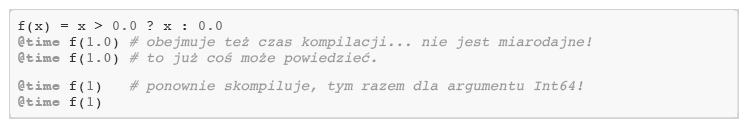
- Gdzie tylko możemy, deklarujmy typu zmiennych/obiektów, nawet jeśli da się to ominąć.
- Domyślnie wycinanie kawałka macierzy tworzy kopię. Rezygnacja z kopiowania na rzecz widoku może przyspieszyć program. Dla wygody możemy skorzystać z makra `@views` , które automatycznie zamienia kopiowanie na
tworzenie widoku. Przykładowe użycie: `@views fview(x) = sum(x[2:end-1]);`.


## Na czym uruchamiamy kod?

In [ ]:
!cat /proc/cpuinfo

LoadError: ignored

In [ ]:
!df -h

LoadError: ignored

## Instalacja bibliotek

In [4]:
using Pkg
Pkg.add(["Plots", "Flux", "PGFPlots", "LinearAlgebra", "LaTeXStrings", "Colors", "ColorSchemes", "Images", "PyPlot", "TikzPictures", "BenchmarkTools"])

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


In [5]:
import Pkg
Pkg.add(PackageSpec(url="https://github.com/sisl/Vec.jl.git"))

    Updating git-repo `https://github.com/sisl/Vec.jl.git`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


In [6]:
Pkg.installed()

┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.6/Pkg/src/Pkg.jl:565


Dict{String, VersionNumber} with 13 entries:
  "CUDA"           => v"3.2.1"
  "BenchmarkTools" => v"1.0.0"
  "ColorSchemes"   => v"3.12.1"
  "LaTeXStrings"   => v"1.2.1"
  "Images"         => v"0.24.1"
  "IJulia"         => v"1.23.2"
  "Plots"          => v"1.16.2"
  "PyPlot"         => v"2.9.0"
  "PGFPlots"       => v"3.4.0"
  "Colors"         => v"0.12.8"
  "Flux"           => v"0.12.4"
  "Vec"            => v"2.0.2"
  "TikzPictures"   => v"3.3.3"

Importy do Main

In [1]:
# using PGFPlots
using Plots
using Colors
using ColorSchemes
using LinearAlgebra
using Vec
using BenchmarkTools


SyntaxError: ignored

Pomocnicze do wykresów



In [ ]:
pasteljet = ColorMaps.RGBArrayMap(ColorSchemes.viridis, interpolation_levels=500, invert=true);
pastelRedBlue = ColorMaps.RGBArrayMap([RGB(246/255, 21/255, 92/255),
                                       RGB(1.0,1.0,1.0),
                                       RGB( 27/255,161/255,234/255)], interpolation_levels=500);
pushPGFPlotsPreamble("\\pgfplotscreateplotcyclelist{pastelcolors}{%")
pushPGFPlotsPreamble("  solid, pastelPurple, mark=none\\\\%")
pushPGFPlotsPreamble("  solid, pastelBlue, mark=none\\\\%")
pushPGFPlotsPreamble("  solid, pastelGreen, mark=none\\\\%")
pushPGFPlotsPreamble("  solid, pastelRed, mark=none\\\\%")
pushPGFPlotsPreamble("  solid, pastelMagenta, mark=none\\\\%")
pushPGFPlotsPreamble("  solid, pastelOrange, mark=none\\\\%")
pushPGFPlotsPreamble("  solid, pastelSeaGreen, mark=none\\\\%")
pushPGFPlotsPreamble("}")
pushPGFPlotsPreamble("\\usepackage{amsmath}")
pushPGFPlotsPreamble("\\usepackage{xfrac}")
pushPGFPlotsPreamble("\\usepgfplotslibrary{fillbetween}")
pushPGFPlotsPreamble("\\usepgfplotslibrary{statistics}")
pushPGFPlotsPreamble("\\definecolor{pastelMagenta}{HTML}{FF48CF}")
pushPGFPlotsPreamble("\\definecolor{pastelPurple}{HTML}{8770FE}")
pushPGFPlotsPreamble("\\definecolor{pastelBlue}{HTML}{1BA1EA}")
pushPGFPlotsPreamble("\\definecolor{pastelSeaGreen}{HTML}{14B57F}")
pushPGFPlotsPreamble("\\definecolor{pastelGreen}{HTML}{3EAA0D}")
pushPGFPlotsPreamble("\\definecolor{pastelOrange}{HTML}{C38D09}")
pushPGFPlotsPreamble("\\definecolor{pastelRed}{HTML}{F5615C}")
pushPGFPlotsPreamble("\\tikzset{myarrow/.style={line width = 0.05cm, ->, rounded corners=5mm}}")
pushPGFPlotsPreamble("\\newcommand{\\vect}[1]{\\boldsymbol{\\mathbf{#1}}}")
pushPGFPlotsPreamble("\\newcommand{\\mat}[1]{\\vect{#1}}")
pushPGFPlotsPreamble("\\pgfplotsset{")
pushPGFPlotsPreamble("   	colormap={pasteljet}{")
pushPGFPlotsPreamble("		rgb=(0.99325,0.90616,0.14394)")
pushPGFPlotsPreamble("		rgb=(0.98387,0.90487,0.13690)")
pushPGFPlotsPreamble("		rgb=(0.97442,0.90359,0.13021)")
pushPGFPlotsPreamble("		rgb=(0.96489,0.90232,0.12394)")
pushPGFPlotsPreamble("		rgb=(0.95530,0.90107,0.11813)")
pushPGFPlotsPreamble("		rgb=(0.94564,0.89982,0.11284)")
pushPGFPlotsPreamble("		rgb=(0.93590,0.89857,0.10813)")
pushPGFPlotsPreamble("		rgb=(0.92611,0.89733,0.10407)")
pushPGFPlotsPreamble("		rgb=(0.91624,0.89609,0.10072)")
pushPGFPlotsPreamble("		rgb=(0.90631,0.89485,0.09813)")
pushPGFPlotsPreamble("		rgb=(0.89632,0.89362,0.09634)")
pushPGFPlotsPreamble("		rgb=(0.88627,0.89237,0.09537)")
pushPGFPlotsPreamble("		rgb=(0.87617,0.89112,0.09525)")
pushPGFPlotsPreamble("		rgb=(0.86601,0.88987,0.09595)")
pushPGFPlotsPreamble("		rgb=(0.85581,0.88860,0.09745)")
pushPGFPlotsPreamble("		rgb=(0.84556,0.88732,0.09970)")
pushPGFPlotsPreamble("		rgb=(0.83527,0.88603,0.10265)")
pushPGFPlotsPreamble("		rgb=(0.82494,0.88472,0.10622)")
pushPGFPlotsPreamble("		rgb=(0.81458,0.88339,0.11035)")
pushPGFPlotsPreamble("		rgb=(0.80418,0.88205,0.11496)")
pushPGFPlotsPreamble("		rgb=(0.79376,0.88068,0.12001)")
pushPGFPlotsPreamble("		rgb=(0.78331,0.87928,0.12540)")
pushPGFPlotsPreamble("		rgb=(0.77285,0.87787,0.13111)")
pushPGFPlotsPreamble("		rgb=(0.76237,0.87642,0.13706)")
pushPGFPlotsPreamble("		rgb=(0.75188,0.87495,0.14323)")
pushPGFPlotsPreamble("		rgb=(0.74139,0.87345,0.14956)")
pushPGFPlotsPreamble("		rgb=(0.73089,0.87192,0.15603)")
pushPGFPlotsPreamble("		rgb=(0.72039,0.87035,0.16260)")
pushPGFPlotsPreamble("		rgb=(0.70990,0.86875,0.16926)")
pushPGFPlotsPreamble("		rgb=(0.69942,0.86712,0.17597)")
pushPGFPlotsPreamble("		rgb=(0.68894,0.86545,0.18272)")
pushPGFPlotsPreamble("		rgb=(0.67849,0.86374,0.18950)")
pushPGFPlotsPreamble("		rgb=(0.66805,0.86200,0.19629)")
pushPGFPlotsPreamble("		rgb=(0.65764,0.86022,0.20308)")
pushPGFPlotsPreamble("		rgb=(0.64726,0.85840,0.20986)")
pushPGFPlotsPreamble("		rgb=(0.63690,0.85654,0.21662)")
pushPGFPlotsPreamble("		rgb=(0.62658,0.85464,0.22335)")
pushPGFPlotsPreamble("		rgb=(0.61629,0.85271,0.23005)")
pushPGFPlotsPreamble("		rgb=(0.60604,0.85073,0.23671)")
pushPGFPlotsPreamble("		rgb=(0.59584,0.84872,0.24333)")
pushPGFPlotsPreamble("		rgb=(0.58568,0.84666,0.24990)")
pushPGFPlotsPreamble("		rgb=(0.57556,0.84457,0.25642)")
pushPGFPlotsPreamble("		rgb=(0.56550,0.84243,0.26288)")
pushPGFPlotsPreamble("		rgb=(0.55548,0.84025,0.26928)")
pushPGFPlotsPreamble("		rgb=(0.54552,0.83804,0.27563)")
pushPGFPlotsPreamble("		rgb=(0.53562,0.83579,0.28191)")
pushPGFPlotsPreamble("		rgb=(0.52578,0.83349,0.28813)")
pushPGFPlotsPreamble("		rgb=(0.51599,0.83116,0.29428)")
pushPGFPlotsPreamble("		rgb=(0.50627,0.82879,0.30036)")
pushPGFPlotsPreamble("		rgb=(0.49661,0.82638,0.30638)")
pushPGFPlotsPreamble("		rgb=(0.48703,0.82393,0.31232)")
pushPGFPlotsPreamble("		rgb=(0.47750,0.82144,0.31820)")
pushPGFPlotsPreamble("		rgb=(0.46805,0.81892,0.32400)")
pushPGFPlotsPreamble("		rgb=(0.45867,0.81636,0.32973)")
pushPGFPlotsPreamble("		rgb=(0.44937,0.81377,0.33538)")
pushPGFPlotsPreamble("		rgb=(0.44014,0.81114,0.34097)")
pushPGFPlotsPreamble("		rgb=(0.43098,0.80847,0.34648)")
pushPGFPlotsPreamble("		rgb=(0.42191,0.80577,0.35191)")
pushPGFPlotsPreamble("		rgb=(0.41291,0.80304,0.35727)")
pushPGFPlotsPreamble("		rgb=(0.40400,0.80027,0.36255)")
pushPGFPlotsPreamble("		rgb=(0.39517,0.79748,0.36776)")
pushPGFPlotsPreamble("		rgb=(0.38643,0.79464,0.37289)")
pushPGFPlotsPreamble("		rgb=(0.37778,0.79178,0.37794)")
pushPGFPlotsPreamble("		rgb=(0.36921,0.78889,0.38291)")
pushPGFPlotsPreamble("		rgb=(0.36074,0.78596,0.38781)")
pushPGFPlotsPreamble("		rgb=(0.35236,0.78301,0.39264)")
pushPGFPlotsPreamble("		rgb=(0.34407,0.78003,0.39738)")
pushPGFPlotsPreamble("		rgb=(0.33588,0.77702,0.40205)")
pushPGFPlotsPreamble("		rgb=(0.32780,0.77398,0.40664)")
pushPGFPlotsPreamble("		rgb=(0.31981,0.77091,0.41115)")
pushPGFPlotsPreamble("		rgb=(0.31193,0.76782,0.41559)")
pushPGFPlotsPreamble("		rgb=(0.30415,0.76470,0.41994)")
pushPGFPlotsPreamble("		rgb=(0.29648,0.76156,0.42422)")
pushPGFPlotsPreamble("		rgb=(0.28892,0.75839,0.42843)")
pushPGFPlotsPreamble("		rgb=(0.28148,0.75520,0.43255)")
pushPGFPlotsPreamble("		rgb=(0.27415,0.75199,0.43660)")
pushPGFPlotsPreamble("		rgb=(0.26694,0.74875,0.44057)")
pushPGFPlotsPreamble("		rgb=(0.25986,0.74549,0.44447)")
pushPGFPlotsPreamble("		rgb=(0.25290,0.74221,0.44828)")
pushPGFPlotsPreamble("		rgb=(0.24607,0.73891,0.45202)")
pushPGFPlotsPreamble("		rgb=(0.23937,0.73559,0.45569)")
pushPGFPlotsPreamble("		rgb=(0.23281,0.73225,0.45928)")
pushPGFPlotsPreamble("		rgb=(0.22640,0.72889,0.46279)")
pushPGFPlotsPreamble("		rgb=(0.22012,0.72551,0.46623)")
pushPGFPlotsPreamble("		rgb=(0.21400,0.72211,0.46959)")
pushPGFPlotsPreamble("		rgb=(0.20803,0.71870,0.47287)")
pushPGFPlotsPreamble("		rgb=(0.20222,0.71527,0.47608)")
pushPGFPlotsPreamble("		rgb=(0.19657,0.71183,0.47922)")
pushPGFPlotsPreamble("		rgb=(0.19109,0.70837,0.48228)")
pushPGFPlotsPreamble("		rgb=(0.18578,0.70489,0.48527)")
pushPGFPlotsPreamble("		rgb=(0.18065,0.70140,0.48819)")
pushPGFPlotsPreamble("		rgb=(0.17571,0.69790,0.49103)")
pushPGFPlotsPreamble("		rgb=(0.17095,0.69438,0.49380)")
pushPGFPlotsPreamble("		rgb=(0.16638,0.69086,0.49650)")
pushPGFPlotsPreamble("		rgb=(0.16202,0.68732,0.49913)")
pushPGFPlotsPreamble("		rgb=(0.15785,0.68376,0.50169)")
pushPGFPlotsPreamble("		rgb=(0.15389,0.68020,0.50417)")
pushPGFPlotsPreamble("		rgb=(0.15015,0.67663,0.50659)")
pushPGFPlotsPreamble("		rgb=(0.14662,0.67305,0.50894)")
pushPGFPlotsPreamble("		rgb=(0.14330,0.66946,0.51121)")
pushPGFPlotsPreamble("		rgb=(0.14021,0.66586,0.51343)")
pushPGFPlotsPreamble("		rgb=(0.13734,0.66225,0.51557)")
pushPGFPlotsPreamble("		rgb=(0.13469,0.65864,0.51765)")
pushPGFPlotsPreamble("		rgb=(0.13227,0.65501,0.51966)")
pushPGFPlotsPreamble("		rgb=(0.13007,0.65138,0.52161)")
pushPGFPlotsPreamble("		rgb=(0.12809,0.64775,0.52349)")
pushPGFPlotsPreamble("		rgb=(0.12633,0.64411,0.52531)")
pushPGFPlotsPreamble("		rgb=(0.12478,0.64046,0.52707)")
pushPGFPlotsPreamble("		rgb=(0.12344,0.63681,0.52876)")
pushPGFPlotsPreamble("		rgb=(0.12231,0.63315,0.53040)")
pushPGFPlotsPreamble("		rgb=(0.12138,0.62949,0.53197)")
pushPGFPlotsPreamble("		rgb=(0.12064,0.62583,0.53349)")
pushPGFPlotsPreamble("		rgb=(0.12008,0.62216,0.53495)")
pushPGFPlotsPreamble("		rgb=(0.11970,0.61849,0.53635)")
pushPGFPlotsPreamble("		rgb=(0.11948,0.61482,0.53769)")
pushPGFPlotsPreamble("		rgb=(0.11942,0.61114,0.53898)")
pushPGFPlotsPreamble("		rgb=(0.11951,0.60746,0.54022)")
pushPGFPlotsPreamble("		rgb=(0.11974,0.60379,0.54140)")
pushPGFPlotsPreamble("		rgb=(0.12009,0.60010,0.54253)")
pushPGFPlotsPreamble("		rgb=(0.12057,0.59642,0.54361)")
pushPGFPlotsPreamble("		rgb=(0.12115,0.59274,0.54464)")
pushPGFPlotsPreamble("		rgb=(0.12183,0.58905,0.54562)")
pushPGFPlotsPreamble("		rgb=(0.12261,0.58537,0.54656)")
pushPGFPlotsPreamble("		rgb=(0.12346,0.58169,0.54744)")
pushPGFPlotsPreamble("		rgb=(0.12440,0.57800,0.54829)")
pushPGFPlotsPreamble("		rgb=(0.12539,0.57432,0.54909)")
pushPGFPlotsPreamble("		rgb=(0.12645,0.57063,0.54984)")
pushPGFPlotsPreamble("		rgb=(0.12757,0.56695,0.55056)")
pushPGFPlotsPreamble("		rgb=(0.12873,0.56327,0.55123)")
pushPGFPlotsPreamble("		rgb=(0.12993,0.55958,0.55186)")
pushPGFPlotsPreamble("		rgb=(0.13117,0.55590,0.55246)")
pushPGFPlotsPreamble("		rgb=(0.13244,0.55222,0.55302)")
pushPGFPlotsPreamble("		rgb=(0.13374,0.54853,0.55354)")
pushPGFPlotsPreamble("		rgb=(0.13507,0.54485,0.55403)")
pushPGFPlotsPreamble("		rgb=(0.13641,0.54117,0.55448)")
pushPGFPlotsPreamble("		rgb=(0.13777,0.53749,0.55491)")
pushPGFPlotsPreamble("		rgb=(0.13915,0.53381,0.55530)")
pushPGFPlotsPreamble("		rgb=(0.14054,0.53013,0.55566)")
pushPGFPlotsPreamble("		rgb=(0.14194,0.52645,0.55599)")
pushPGFPlotsPreamble("		rgb=(0.14334,0.52277,0.55629)")
pushPGFPlotsPreamble("		rgb=(0.14476,0.51909,0.55657)")
pushPGFPlotsPreamble("		rgb=(0.14618,0.51541,0.55682)")
pushPGFPlotsPreamble("		rgb=(0.14761,0.51173,0.55705)")
pushPGFPlotsPreamble("		rgb=(0.14904,0.50805,0.55725)")
pushPGFPlotsPreamble("		rgb=(0.15048,0.50437,0.55743)")
pushPGFPlotsPreamble("		rgb=(0.15192,0.50069,0.55759)")
pushPGFPlotsPreamble("		rgb=(0.15336,0.49700,0.55772)")
pushPGFPlotsPreamble("		rgb=(0.15482,0.49331,0.55784)")
pushPGFPlotsPreamble("		rgb=(0.15627,0.48962,0.55794)")
pushPGFPlotsPreamble("		rgb=(0.15773,0.48593,0.55801)")
pushPGFPlotsPreamble("		rgb=(0.15919,0.48224,0.55807)")
pushPGFPlotsPreamble("		rgb=(0.16067,0.47854,0.55812)")
pushPGFPlotsPreamble("		rgb=(0.16214,0.47484,0.55814)")
pushPGFPlotsPreamble("		rgb=(0.16362,0.47113,0.55815)")
pushPGFPlotsPreamble("		rgb=(0.16512,0.46742,0.55814)")
pushPGFPlotsPreamble("		rgb=(0.16662,0.46371,0.55812)")
pushPGFPlotsPreamble("		rgb=(0.16813,0.45999,0.55808)")
pushPGFPlotsPreamble("		rgb=(0.16965,0.45626,0.55803)")
pushPGFPlotsPreamble("		rgb=(0.17118,0.45253,0.55797)")
pushPGFPlotsPreamble("		rgb=(0.17272,0.44879,0.55788)")
pushPGFPlotsPreamble("		rgb=(0.17427,0.44504,0.55779)")
pushPGFPlotsPreamble("		rgb=(0.17584,0.44129,0.55768)")
pushPGFPlotsPreamble("		rgb=(0.17742,0.43753,0.55756)")
pushPGFPlotsPreamble("		rgb=(0.17902,0.43376,0.55743)")
pushPGFPlotsPreamble("		rgb=(0.18063,0.42997,0.55728)")
pushPGFPlotsPreamble("		rgb=(0.18226,0.42618,0.55712)")
pushPGFPlotsPreamble("		rgb=(0.18390,0.42238,0.55694)")
pushPGFPlotsPreamble("		rgb=(0.18556,0.41857,0.55675)")
pushPGFPlotsPreamble("		rgb=(0.18723,0.41475,0.55655)")
pushPGFPlotsPreamble("		rgb=(0.18892,0.41091,0.55633)")
pushPGFPlotsPreamble("		rgb=(0.19063,0.40706,0.55609)")
pushPGFPlotsPreamble("		rgb=(0.19236,0.40320,0.55584)")
pushPGFPlotsPreamble("		rgb=(0.19410,0.39932,0.55556)")
pushPGFPlotsPreamble("		rgb=(0.19586,0.39543,0.55528)")
pushPGFPlotsPreamble("		rgb=(0.19764,0.39153,0.55497)")
pushPGFPlotsPreamble("		rgb=(0.19943,0.38761,0.55464)")
pushPGFPlotsPreamble("		rgb=(0.20124,0.38367,0.55429)")
pushPGFPlotsPreamble("		rgb=(0.20306,0.37972,0.55393)")
pushPGFPlotsPreamble("		rgb=(0.20490,0.37575,0.55353)")
pushPGFPlotsPreamble("		rgb=(0.20676,0.37176,0.55312)")
pushPGFPlotsPreamble("		rgb=(0.20862,0.36775,0.55268)")
pushPGFPlotsPreamble("		rgb=(0.21050,0.36373,0.55221)")
pushPGFPlotsPreamble("		rgb=(0.21240,0.35968,0.55171)")
pushPGFPlotsPreamble("		rgb=(0.21430,0.35562,0.55118)")
pushPGFPlotsPreamble("		rgb=(0.21621,0.35153,0.55063)")
pushPGFPlotsPreamble("		rgb=(0.21813,0.34743,0.55004)")
pushPGFPlotsPreamble("		rgb=(0.22006,0.34331,0.54941)")
pushPGFPlotsPreamble("		rgb=(0.22199,0.33916,0.54875)")
pushPGFPlotsPreamble("		rgb=(0.22393,0.33499,0.54805)")
pushPGFPlotsPreamble("		rgb=(0.22586,0.33081,0.54731)")
pushPGFPlotsPreamble("		rgb=(0.22780,0.32659,0.54653)")
pushPGFPlotsPreamble("		rgb=(0.22974,0.32236,0.54571)")
pushPGFPlotsPreamble("		rgb=(0.23167,0.31811,0.54483)")
pushPGFPlotsPreamble("		rgb=(0.23360,0.31383,0.54391)")
pushPGFPlotsPreamble("		rgb=(0.23553,0.30953,0.54294)")
pushPGFPlotsPreamble("		rgb=(0.23744,0.30520,0.54192)")
pushPGFPlotsPreamble("		rgb=(0.23935,0.30085,0.54084)")
pushPGFPlotsPreamble("		rgb=(0.24124,0.29648,0.53971)")
pushPGFPlotsPreamble("		rgb=(0.24311,0.29209,0.53852)")
pushPGFPlotsPreamble("		rgb=(0.24497,0.28768,0.53726)")
pushPGFPlotsPreamble("		rgb=(0.24681,0.28324,0.53594)")
pushPGFPlotsPreamble("		rgb=(0.24863,0.27877,0.53456)")
pushPGFPlotsPreamble("		rgb=(0.25043,0.27429,0.53310)")
pushPGFPlotsPreamble("		rgb=(0.25219,0.26978,0.53158)")
pushPGFPlotsPreamble("		rgb=(0.25394,0.26525,0.52998)")
pushPGFPlotsPreamble("		rgb=(0.25565,0.26070,0.52831)")
pushPGFPlotsPreamble("		rgb=(0.25732,0.25613,0.52656)")
pushPGFPlotsPreamble("		rgb=(0.25897,0.25154,0.52474)")
pushPGFPlotsPreamble("		rgb=(0.26057,0.24692,0.52283)")
pushPGFPlotsPreamble("		rgb=(0.26214,0.24229,0.52084)")
pushPGFPlotsPreamble("		rgb=(0.26366,0.23763,0.51876)")
pushPGFPlotsPreamble("		rgb=(0.26515,0.23296,0.51660)")
pushPGFPlotsPreamble("		rgb=(0.26658,0.22826,0.51435)")
pushPGFPlotsPreamble("		rgb=(0.26797,0.22355,0.51201)")
pushPGFPlotsPreamble("		rgb=(0.26931,0.21882,0.50958)")
pushPGFPlotsPreamble("		rgb=(0.27059,0.21407,0.50705)")
pushPGFPlotsPreamble("		rgb=(0.27183,0.20930,0.50443)")
pushPGFPlotsPreamble("		rgb=(0.27301,0.20452,0.50172)")
pushPGFPlotsPreamble("		rgb=(0.27413,0.19972,0.49891)")
pushPGFPlotsPreamble("		rgb=(0.27519,0.19490,0.49600)")
pushPGFPlotsPreamble("		rgb=(0.27619,0.19007,0.49300)")
pushPGFPlotsPreamble("		rgb=(0.27713,0.18523,0.48990)")
pushPGFPlotsPreamble("		rgb=(0.27801,0.18037,0.48670)")
pushPGFPlotsPreamble("		rgb=(0.27883,0.17549,0.48340)")
pushPGFPlotsPreamble("		rgb=(0.27957,0.17060,0.48000)")
pushPGFPlotsPreamble("		rgb=(0.28025,0.16569,0.47650)")
pushPGFPlotsPreamble("		rgb=(0.28087,0.16077,0.47290)")
pushPGFPlotsPreamble("		rgb=(0.28141,0.15583,0.46920)")
pushPGFPlotsPreamble("		rgb=(0.28189,0.15088,0.46541)")
pushPGFPlotsPreamble("		rgb=(0.28229,0.14591,0.46151)")
pushPGFPlotsPreamble("		rgb=(0.28262,0.14093,0.45752)")
pushPGFPlotsPreamble("		rgb=(0.28288,0.13592,0.45343)")
pushPGFPlotsPreamble("		rgb=(0.28307,0.13090,0.44924)")
pushPGFPlotsPreamble("		rgb=(0.28319,0.12585,0.44496)")
pushPGFPlotsPreamble("		rgb=(0.28323,0.12078,0.44058)")
pushPGFPlotsPreamble("		rgb=(0.28320,0.11568,0.43611)")
pushPGFPlotsPreamble("		rgb=(0.28309,0.11055,0.43155)")
pushPGFPlotsPreamble("		rgb=(0.28291,0.10539,0.42690)")
pushPGFPlotsPreamble("		rgb=(0.28266,0.10020,0.42216)")
pushPGFPlotsPreamble("		rgb=(0.28233,0.09495,0.41733)")
pushPGFPlotsPreamble("		rgb=(0.28192,0.08967,0.41241)")
pushPGFPlotsPreamble("		rgb=(0.28145,0.08432,0.40741)")
pushPGFPlotsPreamble("		rgb=(0.28089,0.07891,0.40233)")
pushPGFPlotsPreamble("		rgb=(0.28027,0.07342,0.39716)")
pushPGFPlotsPreamble("		rgb=(0.27957,0.06784,0.39192)")
pushPGFPlotsPreamble("		rgb=(0.27879,0.06214,0.38659)")
pushPGFPlotsPreamble("		rgb=(0.27794,0.05632,0.38119)")
pushPGFPlotsPreamble("		rgb=(0.27702,0.05034,0.37572)")
pushPGFPlotsPreamble("		rgb=(0.27602,0.04417,0.37016)")
pushPGFPlotsPreamble("		rgb=(0.27495,0.03775,0.36454)")
pushPGFPlotsPreamble("		rgb=(0.27381,0.03150,0.35885)")
pushPGFPlotsPreamble("		rgb=(0.27259,0.02556,0.35309)")
pushPGFPlotsPreamble("		rgb=(0.27131,0.01994,0.34727)")
pushPGFPlotsPreamble("		rgb=(0.26994,0.01463,0.34138)")
pushPGFPlotsPreamble("		rgb=(0.26851,0.00961,0.33543)")
pushPGFPlotsPreamble("		rgb=(0.26700,0.00487,0.32942)")
pushPGFPlotsPreamble("	  }")
pushPGFPlotsPreamble("}");

# Implementacje (kod)
Implemetacje algorytmów zaproponowane w pozycji [1] dostępne są pod [tym](https://github.com/sisl/algforopt-notebooks) adresem.




In [8]:
abstract type DescentMethod end

## Metody pierwszego rzędu



## Adam

Wersja z książki *Algorithms for Optimization*

In [9]:
mutable struct BaseAdam <: DescentMethod
    α       # learning rate
    γv      # update decay
    γs      # gradient decay
    ϵ       # very small value
    k       # step
    v       # 1st moment estimate
    s       # 2nd moment estimate
end

function init!(M::BaseAdam, f, ∇f, x)
    println("BaseAdam instantiated")
    M.k = 0
    M.s = zeros(length(x))
    M.v = zeros(length(x))
    return M
end

function step!(M::BaseAdam, f, ∇f, x)
    α, γv, γs, ϵ, k = M.α, M.γv, M.γs, M.ϵ, M.k
    s, v, g = M.s, M.v, ∇f(x)
    s[:] = γs * s + (1 - γs)*(g .* g)
    v[:] = γv * v + (1 - γv)*g
    M.k = k += 1
    v_hat = v ./ (1 - γv^k)
    s_hat = s ./ (1 - γs^k)
    return x - α*v_hat ./ (sqrt.(s_hat) .+ ϵ)
end

step! (generic function with 1 method)

Wersja z typowaniem

In [10]:
mutable struct TypedAdam <: DescentMethod
    α::Float16     			       # learning rate
    γv::Float64      		       # update decay
    γs::Float64                # gradient decay
    ϵ::Float64                 # very small value
    k::Int32                   # step
    v::Array{Float64, 1}       # 1st moment estimate
    s::Array{Float64, 1}       # 2nd moment estimate
end

function init!(M::TypedAdam, f, ∇f, x)
    println("TypedAdam instantiated")
    M.ϵ = 1e-8
    M.s = zeros(length(x))
    M.v = zeros(length(x))
    return M
end

function step!(M::TypedAdam, f, ∇f, x)
    α, γv, γs, ϵ, k = M.α, M.γv, M.γs, M.ϵ, M.k
    s, v, g = M.s, M.v, ∇f(x)
    s[:] = γs * s + (1.0 - γs)*(g .* g)
    v[:] = γv * v + (1.0 - γv)*g
    M.k = k += 1
    v_hat = v ./ (1.0 - γv^k)
    s_hat = s ./ (1.0 - γs^k)
    return x - α*v_hat ./ (sqrt.(s_hat) .+ ϵ)
end


step! (generic function with 2 methods)

Wersja z widokami

In [11]:
mutable struct ViewedAdam <: DescentMethod
    α     	# learning rate
    γv      # update decay
    γs      # gradient decay
    ϵ       # very small value
    k       # step
    v       # 1st moment estimate
    s       # 2nd moment estimate
end

function init!(M::ViewedAdam, f, ∇f, x)
    println("ViewedAdam instantiated")
    M.ϵ = 1e-8
    M.s = zeros(length(x))
    M.v = zeros(length(x))
    return M
end

function step!(M::ViewedAdam, f, ∇f, x)
    α, γv, γs, ϵ, k = M.α, M.γv, M.γs, M.ϵ, M.k
    s, v, g = M.s, M.v, ∇f(x)
    @views s[:] = γs * s + (1.0 - γs)*(g .* g)
    @views v[:] = γv * v + (1.0 - γv)*g
    M.k = k += 1
    @views v_hat = v ./ (1.0 - γv^k)
    @views s_hat = s ./ (1.0 - γs^k)
    return x - α*v_hat ./ (sqrt.(s_hat) .+ ϵ)
end

step! (generic function with 3 methods)

Wersja z typowaniem i widokami

In [12]:
mutable struct TypedViewedAdam <: DescentMethod
    α::Float16     			       # learning rate
    γv::Float64      		       # update decay
    γs::Float64                # gradient decay
    ϵ::Float64                 # very small value
    k::Int32                   # step
    v::Array{Float64, 1}       # 1st moment estimate
    s::Array{Float64, 1}       # 2nd moment estimate
end

function init!(M::TypedViewedAdam, f, ∇f, x)
    println("TypedViewedAdam instantiated")
    M.ϵ = 1e-8
    M.s = zeros(length(x))
    M.v = zeros(length(x))
    return M
end

function step!(M::TypedViewedAdam, f, ∇f, x)
    α, γv, γs, ϵ, k = M.α, M.γv, M.γs, M.ϵ, M.k
    s, v, g = M.s, M.v, ∇f(x)
    @views s[:] = γs * s + (1.0 - γs)*(g .* g)
    @views v[:] = γv * v + (1.0 - γv)*g
    M.k = k += 1
    @views v_hat = v ./ (1.0 - γv^k)
    @views s_hat = s ./ (1.0 - γs^k)
    return x - α*v_hat ./ (sqrt.(s_hat) .+ ϵ)
end


step! (generic function with 4 methods)

## Metody drugiego rzędu


In [13]:
function _line_search(f, x, d)
    d = normalize(d)
    objective = α -> f(x + α*d)
    v, α = f(x), 1e-6
    while f(x + α*d) < v
        v = f(x + α*d)
        α += 1e-6
    end
    return x + α*d
end

_line_search (generic function with 1 method)

In [14]:
function _line_search_types(f, x, d)
    d = normalize(d)
    v::Float64, α::Float64 = f(x), 1e-6
    while f(x + α*d) < v
        v = f(x + α*d)
        α += 1e-6
    end
    return x + α*d
end

_line_search_types (generic function with 1 method)

In [15]:
function _line_search_views(f, x, d)
    @views d::Array{Float64, 1} = normalize(d)
    objective = α -> f(x + α*d)
    v, α = f(x), 1e-6
    while f(x + α*d) < v
        v = f(x + α*d)
        α += 1e-6
    end
    return x + α*d
end

_line_search_views (generic function with 1 method)

In [16]:
function _line_search_views_types(f, x, d)
    @views d::Array{Float64, 1} = normalize(d)
    v::Float64, α::Float64 = f(x), 1e-6
    while f(x + α*d) < v
        v = f(x + α*d)
        α += 1e-6
    end
    return x + α*d
end

_line_search_views_types (generic function with 1 method)

## BFGS



Wersja z książki *Algorithms for Optimization*

In [17]:
mutable struct BaseBFGS <: DescentMethod
    Q
end

function init!(M::BaseBFGS, f, ∇f, x)
    println("BaseBFGS instantiated")
    M.Q = Matrix(1.0I, length(x), length(x))
    return M
end

function step!(M::BaseBFGS, f, ∇f, x)
    Q, g = M.Q, ∇f(x)
    x′ = _line_search(f, x, -Q*g)
    g′ = ∇f(x′)
    δ = x′ - x
      γ = g′ - g
      Q[:] = Q - (δ*γ'*Q + Q*γ*δ')/(δ'*γ) + (1 + (γ'*Q*γ)/(δ'*γ))[1]*(δ*δ')/(δ'*γ)
      return x′
end


step! (generic function with 5 methods)

Wersja z typowaniem

In [18]:
mutable struct TypedBFGS <: DescentMethod
    Q::Array{Float64, 2}
end

function init!(M::TypedBFGS, f, ∇f, x)
    println("TypedBFGS instantiated")
    M.Q = Matrix(1.0I, length(x), length(x))
    return M
end

function step!(M::TypedBFGS, f, ∇f, x)
    Q, g = M.Q, ∇f(x)
    x′ = _line_search_types(f, x, -Q*g)
    g′ = ∇f(x′)
    δ = x′ - x
    γ = g′ - g
    Q[:] = Q - (δ*γ'*Q + Q*γ*δ')/(δ'*γ) + (1 + (γ'*Q*γ)/(δ'*γ))[1]*(δ*δ')/(δ'*γ)
    return x′
end


step! (generic function with 6 methods)

Wersja z widokami

In [19]:
mutable struct ViewedBFGS <: DescentMethod
    Q
end

function init!(M::ViewedBFGS, f, ∇f, x)
    println("ViewedBFGS instantiated")
    M.Q = Matrix(1.0I, length(x), length(x))
    return M
end

function step!(M::ViewedBFGS, f, ∇f, x)
    Q, g = M.Q, ∇f(x)
    x′ = _line_search_views(f, x, -Q*g)
    @views g′ = ∇f(x′)
    δ = x′ - x
    γ = g′ - g
    @views Q[:] = Q - (δ*γ'*Q + Q*γ*δ')/(δ'*γ) + (1 + (γ'*Q*γ)/(δ'*γ))[1]*(δ*δ')/(δ'*γ)
    return x′
end


step! (generic function with 7 methods)

Wersja z typowaniem i widokami

In [20]:
mutable struct TypedViewedBFGS <: DescentMethod
    Q::Array{Float64, 2}
end

function init!(M::TypedViewedBFGS, f, ∇f, x)
    println("TypedViewedBFGS instantiated")
    M.Q = Matrix(1.0I, length(x), length(x))
    return M
end

function step!(M::TypedViewedBFGS, f, ∇f, x)
    Q, g = M.Q, ∇f(x)
    x′ = _line_search_views_types(f, x, -Q*g)
    @views g′ = ∇f(x′) # todo: add typesd to those BFGS variables
    δ = x′ - x
    γ = g′ - g
    @views Q[:] = Q - (δ*γ'*Q + Q*γ*δ')/(δ'*γ) + (1 + (γ'*Q*γ)/(δ'*γ))[1]*(δ*δ')/(δ'*γ)
    return x′
end


step! (generic function with 8 methods)

## Limited-memory BFGS

Wersja z książki *Algorithms for Optimization*

In [21]:
mutable struct BaseLimitedMemoryBFGS <: DescentMethod
    m
    δs
    γs
    qs
end
function init!(M::BaseLimitedMemoryBFGS, f, ∇f, x)
    println("BaseLimitedMemoryBFGS instantiated")
    M.δs = []
    M.γs = []
    M.qs = []
    return M
end
function step!(M::BaseLimitedMemoryBFGS, f, ∇f, x)
    δs, γs, qs, g = M.δs, M.γs, M.qs, ∇f(x)
    m = length(δs)
    if m > 0
        q = g
        for i in m : -1 : 1
            qs[i] = copy(q)
            q -= (δs[i]⋅q)/(γs[i]⋅δs[i])*γs[i]
        end
        z = (γs[m] .* δs[m] .* q) / (γs[m]⋅γs[m])
        for i in 1 : m
            z += δs[i]*(δs[i]⋅qs[i] - γs[i]⋅z)/(γs[i]⋅δs[i])
        end
        x′ = _line_search(f, x, -z)
    else
        x′ = _line_search(f, x, -g)
    end
    g′ = ∇f(x′)
    push!(δs, x′ - x); push!(γs, g′ - g)
    push!(qs, zeros(length(x)))
    while length(δs) > M.m
        popfirst!(δs); popfirst!(γs); popfirst!(qs)
    end
    return x′
end

step! (generic function with 9 methods)

Wersja z typowaniem

In [22]:
mutable struct TypedLimitedMemoryBFGS <: DescentMethod
    m::Int8
    δs::Array{Array{Float64, 1}, 1}
    γs::Array{Array{Float64, 1}, 1}
    qs::Array{Array{Float64, 1}, 1}
end

function init!(M::TypedLimitedMemoryBFGS, f, ∇f, x)
    println("TypedLimitedMemoryBFGS instantiated")
    M.δs = []
    M.γs = []
    M.qs = []
    return M
end

function step!(M::TypedLimitedMemoryBFGS, f, ∇f, x)
    δs, γs, qs, g = M.δs, M.γs, M.qs, ∇f(x)
    m = length(δs)
    if m > 0
        q = g
        for i in m : -1 : 1
            qs[i] = copy(q)
            q -= (δs[i]⋅q)/(γs[i]⋅δs[i])*γs[i]
        end
        z = (γs[m] .* δs[m] .* q) / (γs[m]⋅γs[m])
        for i in 1 : m
            z += δs[i]*(δs[i]⋅qs[i] - γs[i]⋅z)/(γs[i]⋅δs[i])
        end
        x′ = _line_search_types(f, x, -z)
    else
        x′ = _line_search_types(f, x, -g)
    end
    g′::Array{Float64, 1} = ∇f(x′)
    push!(δs, x′ - x); push!(γs, g′ - g)
    push!(qs, zeros(length(x)))
    while length(δs) > M.m
        popfirst!(δs); popfirst!(γs); popfirst!(qs)
    end
    return x′
end


step! (generic function with 10 methods)

Wersja z widokami

In [23]:
mutable struct ViewedLimitedMemoryBFGS <: DescentMethod
    m
    δs
    γs
    qs
end

function init!(M::ViewedLimitedMemoryBFGS, f, ∇f, x)
    println("ViewedLimitedMemoryBFGS instantiated")
    M.δs = []
    M.γs = []
    M.qs = []
    return M
end

function step!(M::ViewedLimitedMemoryBFGS, f, ∇f, x)
    δs, γs, qs, g = M.δs, M.γs, M.qs, ∇f(x)
    m = length(δs)
    if m > 0
        q = g
        for i in m : -1 : 1
            qs[i] = copy(q)
            q -= (δs[i]⋅q)/(γs[i]⋅δs[i])*γs[i]
        end
        z = (γs[m] .* δs[m] .* q) / (γs[m]⋅γs[m])
        for i in 1 : m
            z += δs[i]*(δs[i]⋅qs[i] - γs[i]⋅z)/(γs[i]⋅δs[i])
        end
        x′ = _line_search_views(f, x, -z)
    else
        x′ = _line_search_views(f, x, -g)
    end
    @views g′ = ∇f(x′)
    push!(δs, x′ - x); push!(γs, g′ - g)
    push!(qs, zeros(length(x)))
    while length(δs) > M.m
        popfirst!(δs); popfirst!(γs); popfirst!(qs)
    end
    return x′
end


step! (generic function with 11 methods)

Wersja z typowaniem i widokami

In [24]:
mutable struct TypedViewedLimitedMemoryBFGS <: DescentMethod
    m::Int8
    δs::Array{Array{Float64, 1}, 1}
    γs::Array{Array{Float64, 1}, 1}
    qs::Array{Array{Float64, 1}, 1}
end

function init!(M::TypedViewedLimitedMemoryBFGS, f, ∇f, x)
    println("TypedViewedLimitedMemoryBFGS instantiated")
    M.δs = []
    M.γs = []
    M.qs = []
    return M
end

function step!(M::TypedViewedLimitedMemoryBFGS, f, ∇f, x)
    δs, γs, qs, g = M.δs, M.γs, M.qs, ∇f(x)
    m = length(δs)
    if m > 0
        q = g
        for i in m : -1 : 1
            qs[i] = copy(q)
            q -= (δs[i]⋅q)/(γs[i]⋅δs[i])*γs[i]
        end
        z = (γs[m] .* δs[m] .* q) / (γs[m]⋅γs[m])
        for i in 1 : m
            z += δs[i]*(δs[i]⋅qs[i] - γs[i]⋅z)/(γs[i]⋅δs[i])
        end
        x′ = _line_search_views_types(f, x, -z)
    else
        x′ = _line_search_views_types(f, x, -g)
    end
    @views g′::Array{Float64, 1} = ∇f(x′)
    push!(δs, x′ - x); push!(γs, g′ - g)
    push!(qs, zeros(length(x)))
    while length(δs) > M.m
        popfirst!(δs); popfirst!(γs); popfirst!(qs)
    end
    return x′
end


step! (generic function with 12 methods)

## Funkcje celu

Funkcja Rosenbrocka

In [ ]:
p = let
	rosenbrock(x; a=1, b=5) = (a-x[1])^2 + b*(x[2] - x[1]^2)^2

	xdomain = (-2, 2)
	ydomain = (-2, 2)

	plots = PGFPlots.Plot[]
	push!(plots, PGFPlots.Contour(rosenbrock, xdomain, ydomain, levels=[1,2,3,5,10,20,50,100], style="width=\\columnwidth", xbins=100, ybins=100))
	Axis(plots, width="8cm", height="8cm", xlabel=L"x_1", ylabel=L"x_2", style="contour/labels=false, axis equal, view={0}{90}")
end

# PGFPlots.plot(p)

Axis(PGFPlots.Plots.Plot[PGFPlots.Plots.Contour([189.0 186.5839200081624 … 29.81624324048567 29.0; 179.28816161749407 176.93672149439803 … 26.439111994645906 25.68750862290173; … ; 171.44977777911024 169.0983376560142 … 18.600728156262065 17.84912478451789; 181.0 178.5839200081624 … 21.81624324048567 21.0], -2.0:0.04040404040404041:2.0, -2.0:0.04040404040404041:2.0, "width=\\columnwidth", nothing, nothing, [1, 2, 3, 5, 10, 20, 50, 100], nothing, nothing)], nothing, L"$x_1$", nothing, L"$x_2$", nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, "8cm", "8cm", "contour/labels=false, axis equal, view={0}{90}", nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, "axis")

Wheeler

In [ ]:
using TikzPictures

p = let
	wheeler(x, a=1.5) = -exp(-(x[1]*x[2] - a)^2 -(x[2]-a)^2)

	xdom = (-8,25)
	ydom = (-3,6)

	Axis(PGFPlots.Image((x,y)->wheeler([x,y]), xdom, ydom, xbins=1200, ybins=480, colormap = pasteljet, colorbar = false),
	     xmin=xdom[1], xmax=xdom[2], ymin=ydom[1], ymax=ydom[2], width="12cm", height="4.8cm", style="view={0}{90}", xlabel=L"x_1", ylabel=L"x_2")
end

# PGFPlots.plot(p)

Axis(PGFPlots.Plots.Plot[PGFPlots.Plots.Image("tmp_10000000000001.png", -8, 25, -3, 6, -0.999823499610959, -0.0, nothing, false, nothing, PGFPlots.ColorMaps.RGBArrayMap(RGB{Float64}[RGB{Float64}(0.993248,0.906157,0.143936), RGB{Float64}(0.983868,0.904867,0.136897), RGB{Float64}(0.974417,0.90359,0.130215), RGB{Float64}(0.964894,0.902323,0.123941), RGB{Float64}(0.9553,0.901065,0.118128), RGB{Float64}(0.945636,0.899815,0.112838), RGB{Float64}(0.935904,0.89857,0.108131), RGB{Float64}(0.926106,0.89733,0.104071), RGB{Float64}(0.916242,0.896091,0.100717), RGB{Float64}(0.906311,0.894855,0.098125)  …  RGB{Float64}(0.277941,0.056324,0.381191), RGB{Float64}(0.277018,0.050344,0.375715), RGB{Float64}(0.276022,0.044167,0.370164), RGB{Float64}(0.274952,0.037752,0.364543), RGB{Float64}(0.273809,0.031497,0.358853), RGB{Float64}(0.272594,0.025563,0.353093), RGB{Float64}(0.271305,0.019942,0.347269), RGB{Float64}(0.269944,0.014625,0.341379), RGB{Float64}(0.26851,0.009605,0.335427), RGB{Float64}(0.267004,0

Michalewicz

In [ ]:
p = let
michalewicz(x; m=10) = -sum(sin(v)*sin(i*v^2/π)^(2m) for (i,v) in enumerate(x))

xdomain = (0, 4)
ydomain = (0, 4)

plots = Plots.Plot[]
# push!(plots, Plots.Contour(michalewicz, xdomain, ydomain, levels=[-1.8, -1.6, -1.4, -1.2, -1.0, -0.8, -0.6, -0.4, -0.2], style="width=\\columnwidth", xbins=101, ybins=101))
# Axis(plots, width="8cm", height="8cm", xlabel=L"x_1", ylabel=L"x_2", style="contour/labels=false, axis equal, view={0}{90}")
Axis(PGFPlots.Image((x,y)->michalewicz([x,y]), xdomain, ydomain, xbins=600, ybins=600, colormap = pasteljet, colorbar = false),
xmin=xdomain[1], xmax=xdomain[2], ymin=ydomain[1], ymax=ydomain[2], width="8cm", height="8cm", style="view={0}{90}", xlabel=L"x_1", ylabel=L"x_2")
end

# PGFPlots.plot(p)

Axis(PGFPlots.Plots.Plot[PGFPlots.Plots.Image("tmp_10000000000002.png", 0, 4, 0, 4, -1.8012010742431048, 1.0175243954563755, nothing, false, nothing, PGFPlots.ColorMaps.RGBArrayMap(RGB{Float64}[RGB{Float64}(0.993248,0.906157,0.143936), RGB{Float64}(0.983868,0.904867,0.136897), RGB{Float64}(0.974417,0.90359,0.130215), RGB{Float64}(0.964894,0.902323,0.123941), RGB{Float64}(0.9553,0.901065,0.118128), RGB{Float64}(0.945636,0.899815,0.112838), RGB{Float64}(0.935904,0.89857,0.108131), RGB{Float64}(0.926106,0.89733,0.104071), RGB{Float64}(0.916242,0.896091,0.100717), RGB{Float64}(0.906311,0.894855,0.098125)  …  RGB{Float64}(0.277941,0.056324,0.381191), RGB{Float64}(0.277018,0.050344,0.375715), RGB{Float64}(0.276022,0.044167,0.370164), RGB{Float64}(0.274952,0.037752,0.364543), RGB{Float64}(0.273809,0.031497,0.358853), RGB{Float64}(0.272594,0.025563,0.353093), RGB{Float64}(0.271305,0.019942,0.347269), RGB{Float64}(0.269944,0.014625,0.341379), RGB{Float64}(0.26851,0.009605,0.335427), RGB{Float64

##Metody pomocnicze

In [25]:
function run_descent_method(M::DescentMethod, x₀, N, f, ∇f)
    pts = [x₀]
    init!(M, f, ∇f, x₀)
    for i in 1 : N
        step!(M, f, ∇f, pts[end])
        push!(pts, step!(M, f, ∇f, pts[end]))
    end
    return 0
end

function run_descent_method_plot(M::DescentMethod, x₀, N, f, ∇f)
    pts = [x₀]
    iters = []
    init!(M, f, ∇f, x₀)
    for i in 1 : N
        step!(M, f, ∇f, pts[end])
        push!(pts, step!(M, f, ∇f, pts[end]))
        push!(iters, f(pts[end]))
    end
    println(f(pts[end]))
    return iters
end

function test_time(params, x₀, f, ∇f)
    for (M, name, N) in params
        println(name)
        @time pts = run_descent_method(M, x₀, N, f, ∇f)
    end
end

function test_btime(params, x₀, f, ∇f)
    for (M, name, N) in params
        println("Testing $name with btime")
        @btime pts = run_descent_method($M, $x₀, $N, $f, $∇f)
    end
end

function test_time_with_plot(params, x₀, f, ∇f)
    for (M, name, N) in params
        println("Testing $name with time")
        @time pts = run_descent_method_plot(M, x₀, N, f, ∇f)
    end
end

function draw_plot(stuff, N, x₀, f, ∇f)
    plt = plot()
    for (M, name, k) in stuff
        println(name)
        iters = run_descent_method_plot(M, x₀, N, f, ∇f)
        plt = plot!(iters, xlabel="Liczba iteracji", ylabel="Wartość funkcji celu",
            label = "$name and asterix explanation goes here")
        display(plt)
        #savefig(path)
    end
end


LoadError: ignored

##Porównanie metod

In [ ]:
function perform_experiments(x₀, f, ∇f)
    N = Int32(100000)
    tmp = Tuple{DescentMethod, String, Int32}[]

    # Different variations of BFGS optimization

    push!(tmp, (BaseBFGS(Matrix(1.0I, 2, 2)), "BFGS", 22))
    push!(tmp, (TypedBFGS(Matrix(1.0I, 2, 2)), "BFGS*", 22))
    push!(tmp, (ViewedBFGS(Matrix(1.0I, 2, 2)), "BFGS**", 22))
    push!(tmp, (TypedViewedBFGS(Matrix(1.0I, 2, 2)), "BFGS***", 22))

    # Different variations of Limited Memory BFGS

    push!(tmp, (BaseLimitedMemoryBFGS(1, [], [], []), "L-BFGS (m=1)", 22))
    push!(tmp, (TypedLimitedMemoryBFGS(1, [], [], []), "L-BFGS* (m=1)", 22))
    push!(tmp, (ViewedLimitedMemoryBFGS(1, [], [], []), "L-BFGS** (m=1)", 22))
    push!(tmp, (TypedViewedLimitedMemoryBFGS(1, [], [], []), "L-BFGS*** (m=1)", 22))

    # Different variations of Adam optimization

    push!(tmp, (BaseAdam(0.1, 0.9, 0.8, 1e-8, 0, zeros(2), zeros(2)), "Adam, lr=0.1", 210))
    push!(tmp, (TypedAdam(0.1, 0.9, 0.8, 1e-8, 0, zeros(2), zeros(2)), "Adam*, lr=0.1", 210))
    push!(tmp, (ViewedAdam(0.1, 0.9, 0.8, 1e-8, 0, zeros(2), zeros(2)), "Adam**, lr=0.1", 210))
    push!(tmp, (TypedViewedAdam(0.1, 0.9, 0.8, 1e-8, 0, zeros(2), zeros(2)), "Adam***, lr=0.1", 210))

    # test_time(tmp, x₀, f, ∇f)
    # test_btime(tmp, x₀, f, ∇f)
    scoring.draw_plot(tmp, 100, x₀, f, ∇f)
end

perform_experiments (generic function with 1 method)

Testy dla funkcji Rosenbrocka

In [ ]:
rosenbrock_x₀ = [-2., 1.5]
rosenbrock = x -> (1-x[1])^2 + 100*(4x[2] - x[1]^2)^2
rosenbrock_∇ = x -> [2*(200x[1]^3 - 800x[1]*x[2] + x[1] - 1), -800*(x[1]^2 - 4x[2])]

perform_experiments(rosenbrock_x₀, rosenbrock, rosenbrock_∇)

BFGS


LoadError: ignored

Testy dla funkcji Michalewicza

In [ ]:
michalewicz_x₀ = [-0.5, 1.5, -2, 0.5]

michalewicz = x -> (sin(x[1])*(sin(x[1]^2 / π))^20 + sin(x[2])*(sin(2*(x[2])^2 / π))^20 +
      sin(x[3])*(sin(3*(x[3])^2 / π))^20 + sin(x[4])*(sin(4*(x[4])^2 / π))^20)

michalewicz_∇ = x ->  [cos(x[1])*sin(1*(x[1])^2 / π) + sin(x[1])*20*sin(1*x[1]^2 / π)*cos(1*x[1]^2 / π)*2*x[1] / π,
      cos(x[2])*sin(2*(x[2])^2 / π) + sin(x[2])*20*sin(2*x[2]^2 / π)*cos(2*x[2]^2 / π)*4*x[2] / π,
      cos(x[3])*sin(3*(x[3])^2 / π) + sin(x[3])*20*sin(3*x[3]^2 / π)*cos(3*x[3]^2 / π)*6*x[3] / π,
      cos(x[4])*sin(4*(x[4])^2 / π) + sin(x[4])*20*sin(4*x[4]^2 / π)*cos(4*x[4]^2 / π)*8*x[4] / π]

perform_experiments(michalewicz_x₀, michalewicz, michalewicz_∇)


Testing BFGS with btime
  4.007 s (18194378 allocations: 1.90 GiB)
Testing BFGS* with btime
  4.004 s (18193806 allocations: 1.90 GiB)
Testing BFGS** with btime
  3.988 s (18194158 allocations: 1.90 GiB)
Testing BFGS*** with btime
  3.993 s (18193806 allocations: 1.90 GiB)
Testing L-BFGS (m=1) with btime
  870.941 ms (3892807 allocations: 415.74 MiB)
Testing L-BFGS* (m=1) with btime
  867.439 ms (3892122 allocations: 415.72 MiB)
Testing L-BFGS** (m=1) with btime
  868.806 ms (3892807 allocations: 415.74 MiB)
Testing L-BFGS*** (m=1) with btime
  860.114 ms (3892122 allocations: 415.72 MiB)
Testing Adam, lr=0.1 with btime
  1.638 ms (12190 allocations: 759.19 KiB)
Testing Adam*, lr=0.1 with btime
  389.963 μs (5470 allocations: 601.69 KiB)
Testing Adam**, lr=0.1 with btime
  1.639 ms (12610 allocations: 765.75 KiB)
Testing Adam***, lr=0.1 with btime
  396.049 μs (5470 allocations: 601.69 KiB)


Testy dla funkcji Wheelera

In [ ]:
wheeler = x ->   (-exp(-(x[1]*x[2]-3)^2 - (x[2]-3)^2))
wheeler_∇ = x ->  [f(x) * (-2*x[2]^2*x[1] + 3*x[2]),
      f(x) * (-2*x[1]^2*x[2] + 3*x[1] - 2*x[2] + 3)]
wheeler_x₀ = [0.2, 0.3]

perform_experiments(wheeler_x₀, wheeler, wheeler_∇)


Testing BFGS with btime
  762.905 ms (14860730 allocations: 1.33 GiB)
Testing BFGS* with btime
  762.960 ms (14860774 allocations: 1.33 GiB)
Testing BFGS** with btime
  760.195 ms (14860686 allocations: 1.33 GiB)
Testing BFGS*** with btime
  750.252 ms (14860730 allocations: 1.33 GiB)
Testing L-BFGS (m=1) with btime
  1.316 s (25955047 allocations: 2.32 GiB)
Testing L-BFGS* (m=1) with btime
  1.322 s (25955011 allocations: 2.32 GiB)
Testing L-BFGS** (m=1) with btime
  1.314 s (25955047 allocations: 2.32 GiB)
Testing L-BFGS*** (m=1) with btime
  1.314 s (25955011 allocations: 2.32 GiB)
Testing Adam, lr=0.1 with btime
  2.009 ms (15550 allocations: 739.47 KiB)
Testing Adam*, lr=0.1 with btime
  1.229 ms (11770 allocations: 647.59 KiB)
Testing Adam**, lr=0.1 with btime
  2.019 ms (15970 allocations: 746.03 KiB)
Testing Adam***, lr=0.1 with btime
  1.242 ms (11770 allocations: 647.59 KiB)


## Test

In [ ]:
using PGFPlots
p = let
  # ROSENBROCK 2D
  f = x -> (1-x[1])^2 + 100*(4x[2] - x[1]^2)^2
  ∇f = x -> [2*(200x[1]^3 - 800x[1]*x[2] + x[1] - 1), -800*(x[1]^2 - 4x[2])]
  xdomain = (-2.5, 1.4)
  ydomain = (-0.2, 1.7)
  x₀ = VecE2{Float64}(-2,1.5)
  function this_step!(M::DescentMethod, v::VecE2{Float64})
      x = Float64[v.x, v.y]
      return VecE2{Float64}(step!(M, f, ∇f, x)...)
  end

  function run_descent_method_typed(M::DescentMethod, x₀::VecE2{Float64}, N::Int16)
      pts = [x₀]
      init!(M, f, ∇f, convert(Vector{Float64}, x₀))
      for i in 1 : N
          push!(pts, this_step!(M, pts[end]))
      end
      return pts
  end

  function get_descent_plot(pts::Vector{VecE2{Float64}}, name, color::String="black")
      PGFPlots.Linear([P.x for P in pts], [P.y for P in pts], style="thick,
    $color, solid, mark=none, line join=round", legendentry=name) #$
  end

  stuff = Tuple{DescentMethod, String, String, Int16}[]
  push!(stuff, (BFGS(Matrix(1.0I, 2, 2)), "BFGS", "pastelOrange", 22))
  plots = PGFPlots.Plot[]
  push!(plots, PGFPlots.Contour(f, xdomain, ydomain, levels=[5,50,200,500,1000,2000],
   style="forget plot, width=\\columnwidth", xbins=150, ybins=150))
  for (M, name, color, N) in stuff
      pts = run_descent_method_typed(M, x₀, N)
      push!(plots, get_descent_plot(pts, name, color))
  end
  Axis(plots, width="12cm", height="7cm", xlabel=L"x_1", ylabel=L"x_2",
   style="xtick=\\empty, ytick=\\empty, contour/labels=false, view={0}{90}, legend pos=outer north east")
 end
 PGFPlots.plot(p)

LoadError: ignored

TODO
- przygotowanie danych testowych (Pokrycie warunków granicznych - typu min, max, rozbieżność)
- przegląd istniejących algorytmów rozwiązujących problem (odniesienia do aktualnych publikacji z danej dziedziny - Google Scholar!)
- postawienie tezy gdzieś na początku sprawka i potwierdzenie tezy na końcu
- wykresy wartości funkcji celu w zależności od iteracji (wykresy)
- odległość od minimum globalnego (wykresy)
- zbieżność optymalizatorów (wykresy)
- zastosowanie makra @views
- podsumowanie = 4/5 zdań!